# Centrality measures 2

In this class we will consider centrality measures in terms of other node attributes

In [1]:
# as usual we need to import the key libraries we need to store, analyse and plot the network
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# let's also get a network from the folder "data"
a=open("data/net1_edge_list.txt","r")
for i in a:
    n=i.strip().split()
    print (n)
a.close()

['1', '2']
['2', '3']
['3', '1']
['2', '4']
['1', '4']
['1', '5']
['2', '5']
['3', '5']
['5', '6']
['6', '7']
['6', '8']
['6', '9']
['7', '8']
['7', '9']
['9', '10']
['6', '11']
['11', '12']
['11', '13']
['11', '14']
['12', '15']
['13', '14']
['12', '13']


In [3]:
# the data comes as unweighted list of edges
# let's store the network
G=nx.Graph()
a=open("data/net1_edge_list.txt","r")
for i in a:
    n=i.strip().split()
    G.add_edge(n[0],n[1])
a.close()

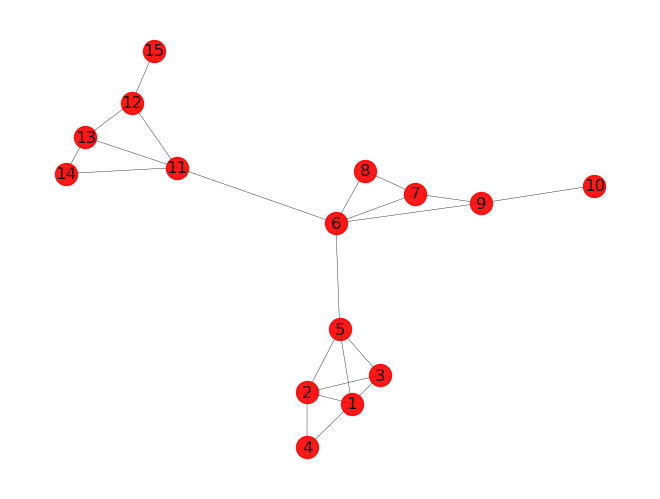

In [4]:
# let's plot the network

nx.draw(G, pos=nx.spring_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black"
        ,node_color="Red",with_labels=True,font_size=12)

## Centrality and Attributes

In [5]:
# what about the attributes?

a=open("data/net1_attributes.txt","r")
for i in a:
    n=i.strip().split()
    print (n)
a.close()

['ID', 'COUNTRY', 'EMPLOYEES']
['1', 'IT', '50']
['2', 'IT', '65']
['3', 'IT', '30']
['4', 'IT', '10']
['5', 'IT', '60']
['6', 'FR', '100']
['7', 'FR', '35']
['8', 'FR', '20']
['9', 'FR', '40']
['10', 'FR', '10']
['11', 'GE', '60']
['12', 'GE', '20']
['13', 'GE', '25']
['14', 'GE', '10']
['15', 'GE', '15']


In [6]:
# is there a correlation between these attributes and the degree?
# for example the higher the degree the higher the number of employees? 
# why this could be the case and how do we check for it?

# the first step is to store these features in the network

a=open("data/net1_attributes.txt","r")
c=0
for i in a:
    n=i.strip().split()
    if c>0:              # why do we need this?
        G.nodes[n[0]]['country']=n[1]
        G.nodes[n[0]]['employees']=int(n[2])
        
    c+=1
a.close()

In [7]:
# let's check if it worked
for i in G.nodes():
    print (i,G.nodes[i])

1 {'country': 'IT', 'employees': 50}
2 {'country': 'IT', 'employees': 65}
3 {'country': 'IT', 'employees': 30}
4 {'country': 'IT', 'employees': 10}
5 {'country': 'IT', 'employees': 60}
6 {'country': 'FR', 'employees': 100}
7 {'country': 'FR', 'employees': 35}
8 {'country': 'FR', 'employees': 20}
9 {'country': 'FR', 'employees': 40}
10 {'country': 'FR', 'employees': 10}
11 {'country': 'GE', 'employees': 60}
12 {'country': 'GE', 'employees': 20}
13 {'country': 'GE', 'employees': 25}
14 {'country': 'GE', 'employees': 10}
15 {'country': 'GE', 'employees': 15}


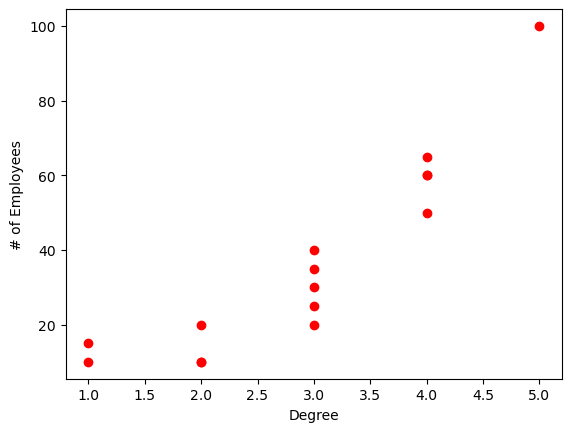

In [8]:
# One way to study the correlation between two quantities are scatter plots
# a plot in which each point P(x1,y1) for each node is shown

# in order to make the plot we just need to gather for each node the value of the degree and the value
# of the number of employees

x=[]
y=[]
for i in G.nodes():
    x.append(G.degree(i))
    y.append(G.nodes[i]['employees'])  # x and y contain the list of degree and number of employees for each node
    
# we can just directly plot the scatter plot
plt.scatter(x,y,marker='o',color='Red')
plt.xlabel('Degree')
plt.ylabel('# of Employees')
plt.show()

In [9]:
# how do we read the plot?
# what did we learn?

In [10]:
# It looks like they are related. But how certain can we be?

# A way of examining correlation systematically is to compare the ranks of each node on each measure.
# We can use the so called kendall tau

all the info here: https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient

In [11]:
# the kendall tau takes two lists
# list1 and list2 that contain the order of nodes according to the two measures
# degree VS number of employees

# let's get the two lists first

list_degree=[]
list_employees=[]
for i in G.nodes():
    list_degree.append([G.degree(i),i])
    list_employees.append([G.nodes[i]['employees'],i])
    
# we need to sort them (the order does not matter as long it is the same for both)

list_degree=sorted(list_degree)
list_employees=sorted(list_employees)

In [12]:
# let's check them
print (list_degree)
print (list_employees)

[[1, '10'], [1, '15'], [2, '14'], [2, '4'], [2, '8'], [3, '12'], [3, '13'], [3, '3'], [3, '7'], [3, '9'], [4, '1'], [4, '11'], [4, '2'], [4, '5'], [5, '6']]
[[10, '10'], [10, '14'], [10, '4'], [15, '15'], [20, '12'], [20, '8'], [25, '13'], [30, '3'], [35, '7'], [40, '9'], [50, '1'], [60, '11'], [60, '5'], [65, '2'], [100, '6']]


In [13]:
# in these settings we need to get the ordered list of nodes ids

map_position_degree={} # this dictionary allows us to get understand the position of each node for the two quantities
c=1
for i in list_degree:
    
    map_position_degree[i[1]]=c   # node i[1] is in rank c
    c+=1
    
map_position_employees={} # this dictionary allows us to get understand the position of each node for the two quantities
c=1
for i in list_employees:
    map_position_employees[i[1]]=c   # node i[1] is in rank c
    c+=1

In [14]:
# what's the output? 
for i in list_employees:
    node=i[1]
    print (node,map_position_degree[node],map_position_employees[node])


10 1 1
14 3 2
4 4 3
15 2 4
12 6 5
8 5 6
13 7 7
3 8 8
7 9 9
9 10 10
1 11 11
11 12 12
5 14 13
2 13 14
6 15 15


In [15]:
# so let's create two lists with the nodes and their ranks
ids_degree=[]
ids_employees=[]
map_position={} # this dictionary allows us to get the position of each node for the first quantity
c=1
for i in list_degree:
    ids_degree.append(c)  # nodes here are in order of degree
    map_position[i[1]]=c   # node i[1] is in rank c
    c+=1
    
# we can use the order of nodes for degree to get what's the relative position for the quantity employees
for i in list_employees:
    ids_employees.append(map_position[i[1]]) # this list the nodes in order of employees and tells me what is the order
                                            # for degree

In [16]:
# let's see the output
print (ids_degree)
print (ids_employees)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[1, 3, 4, 2, 6, 5, 7, 8, 9, 10, 11, 12, 14, 13, 15]


In [17]:
# we need to import another module
import scipy.stats as stats

print (stats.kendalltau(ids_degree,ids_employees))

SignificanceResult(statistic=0.9238095238095239, pvalue=4.4720613503682285e-09)


In [18]:
# what does this mean??

In [19]:
p=stats.kendalltau(ids_degree,ids_employees)[1]
print ("{:.9f}".format(p))

0.000000004


In [20]:
# let's create a function that calculates the ktau given the lists of lists
def k_tau(list1,list2):
    map_rank={} # dictionary to get the rank of each node according to a quantity
    c=1
    ids_list1=[]
    for i in list1:
        map_rank[i[1]]=c
        ids_list1.append(c)  # order according to the first quantity
        c+=1
        
        
    ids_list2=[]
    for i in list2:
        ids_list2.append(map_rank[i[1]]) # add them in order according to the second quantity but with the ranks of
                                        # the first
        
    tau = stats.kendalltau(ids_list1,ids_list2)  # get the kendall tau
    return tau

In [21]:
print (k_tau(list_degree,list_employees))

SignificanceResult(statistic=0.9238095238095239, pvalue=4.4720613503682285e-09)


## Closeness Centrality Correlations

In [22]:
# what about the correlation between closeness and degree in this case?
# as before we can use the kendall tau 
# we created a function that takes as input the list of [value,id node]
# so we need to create the two lists

# let's get the degree first
degree_list=[]
for i in G.nodes():
    degree_list.append([G.degree(i),i])
    
    
# then the closeness centrality
l=nx.closeness_centrality(G)
closeness_list=[]
for i in l:
    closeness_list.append([l[i],i])
    
# we need to order them first!
    
degree_list=sorted(degree_list)
closeness_list=sorted(closeness_list)

for i in range(len(G.nodes())):
    print (degree_list[i][1],closeness_list[i][1])  # this are the two ordered list of nodes for degree and closeness



10 15
15 4
14 10
4 14
8 12
12 13
13 3
3 1
7 2
9 8
1 7
11 9
2 11
5 5
6 6


In [23]:
# we can just call the function to compute the correlation

print (k_tau(degree_list,closeness_list))
p=k_tau(degree_list,closeness_list)[1]
print ("{:.5f}".format(p))

SignificanceResult(statistic=0.7523809523809525, pvalue=1.9694049703970338e-05)
0.00002


In [24]:
# what do we learn?

In [25]:
# what about the correlation between closeness and the number of employees?

a=open("data/net1_attributes.txt","r")
c=0
for i in a:
    n=i.strip().split()
    if c>0:              # why do we need this?
        G.nodes[n[0]]['country']=n[1]
        G.nodes[n[0]]['employees']=int(n[2])
        
    c+=1
a.close()


employees_list=[]
for i in G.nodes():
    employees_list.append([G.nodes[i]['employees'],i])
    
    
# then the closeness centrality
l=nx.closeness_centrality(G)
closeness_list=[]
for i in l:
    closeness_list.append([l[i],i])
    
# we need to order them first!
    
employees_list=sorted(employees_list)
closeness_list=sorted(closeness_list)

In [26]:
print (k_tau(employees_list,closeness_list))
p=k_tau(employees_list,closeness_list)[1]
print ("{:.5f}".format(p))

SignificanceResult(statistic=0.7142857142857143, pvalue=6.710364303783617e-05)
0.00007


In [27]:
# what do we learn?

## Betweenness Centrality Correlations

In [28]:
# what's the relation between the betweenness and the attributes of the nodes such as the number of employees?

# just to be sure, let's load the attributes again

a=open("data/net1_attributes.txt","r")
c=0
for i in a:
    n=i.strip().split()
    if c>0:              # why do we need this?
        G.nodes[n[0]]['country']=n[1]
        G.nodes[n[0]]['employees']=int(n[2])
        
    c+=1
a.close()

In [ ]:
# let's compute the kendall's tau between the betweenness and the number of employees

list_employees=[]
for i in G.nodes():
    list_employees.append([G.nodes[i]['employees'],i])
    
    
l=nx.betweenness_centrality(G)
list_betweenness=[]
for i in l:
    list_betweenness.append([l[i],i])
    
list_employees=sorted(list_employees)
list_betweenness=sorted(list_betweenness)

# let's call the function we wrote for computing the kendall's tau
print (k_tau(list_employees,list_betweenness))
p=k_tau(list_employees,list_betweenness)[1]
print ("{:.5f}".format(p))

In [ ]:
# what do we learn?

In [ ]:
# what about the correlation with degree and closeness?


list_degree=[]
for i in G.nodes():
    list_degree.append([G.degree(i),i])
    
    
l=nx.betweenness_centrality(G)
list_betweenness=[]
for i in l:
    list_betweenness.append([l[i],i])
    
    
l=nx.closeness_centrality(G)
list_closeness=[]
for i in l:
    list_closeness.append([l[i],i])    
    
list_degree=sorted(list_degree)
list_betweenness=sorted(list_betweenness)
list_closeness=sorted(list_closeness)

# let's call the function we wrote for computing the kendall's tau
print ("degree VS Betweenness=", k_tau(list_degree,list_betweenness))
print ("Closeness VS Betweenness=", k_tau(list_closeness,list_betweenness))


In [ ]:
# note that you can directly get the values of tau and the pvalue

print (k_tau(list_closeness,list_betweenness)[0])
print (k_tau(list_closeness,list_betweenness)[1])

## Eigenvector Centrality Correlations

In [ ]:
# what about the correlation with the other centrality measures? 

In [ ]:
# now that we have four metrics it is useful to write a general function that computes the correlation between any pair

# let's first write a function that extracts the ordered list of nodes according to one of the metrics

def get_centrality(G,type_centrality):
    
    
    # for each centrality measure we get the ordered list of values-node id
    if type_centrality=="degree":

        centrality=[]
        for i in G.nodes():
            centrality.append([G.degree(i),i])
        centrality=sorted(centrality,reverse=True)
        
        return centrality  # this means that the function returns as output the sorted list
        
    elif type_centrality=="closeness":

        l=nx.closeness_centrality(G)
        centrality=[]
        for i in G.nodes():
            centrality.append([l[i],i])
        centrality=sorted(centrality,reverse=True)
        return centrality
    
    elif type_centrality=="betweenness":
        l=nx.betweenness_centrality(G)
        centrality=[]
        for i in G.nodes():
            centrality.append([l[i],i])
        centrality=sorted(centrality,reverse=True)
        return centrality
    
    elif type_centrality=="eigenvector":
        l=nx.eigenvector_centrality(G, max_iter=1000, tol=1e-06)
        centrality=[]
        for i in G.nodes():
            centrality.append([l[i],i])
        centrality=sorted(centrality,reverse=True)
        return centrality
    
    else:
        return 0

In [ ]:
# now let's create another function that computes all the possible correlations

def correlation_centralities(G):
    
    # first we get the list of sorted values-node id from the previous function
    degree_centrality=get_centrality(G,"degree")
    closeness_centrality=get_centrality(G,"closeness")
    betweenness_centrality=get_centrality(G,"betweenness")
    eigenvector_centrality=get_centrality(G,"eigenvector")
    
    
    # then let's create a dictionary with how many keys as metrics
    # and as values the name of the metric and the sorted list of values-node id
    dict_centralities={}
    dict_centralities[0]=["degree",degree_centrality]
    dict_centralities[1]=["closeness",closeness_centrality]
    dict_centralities[2]=["betweenness",betweenness_centrality]
    dict_centralities[3]=["eigenvector",eigenvector_centrality]
    
    # now let's sue the function k_tau to compute the correlation between all the possible pairs
    # of different metrics

    list_correlations=[]
    for i in dict_centralities:
        for j in dict_centralities:  # this is a double for loop
            if i<j:  # why this condition?! 
                
                
                pair=dict_centralities[i][0]+"-"+dict_centralities[j][0] # this is string with the names of the two
                # centrality measures
                
                value=k_tau(dict_centralities[i][1],dict_centralities[j][1])[0]  # kendall's tau
                p_value=k_tau(dict_centralities[i][1],dict_centralities[j][1])[1]  # associated pvalue
                
                list_correlations.append([value,p_value,pair])  # let's put all the values in a list
                
                
    # let's sort the list from the highest to the lowest correlation
    list_correlations=sorted(list_correlations,reverse=True)
    return list_correlations  # let's return as output the list of correlation

In [ ]:
list_correlations=correlation_centralities(G)

for i in list_correlations:
    print (i[2],"=",i[0])

In [ ]:
# what do we learn?

In [ ]:
# let's consider another network in the folder
# this is small sample of facebook data

# let's read and store the network
G=nx.Graph()
a=open("data/facebook.edges","r")
for i in a:
    n=i.strip().split()
    G.add_edge(int(n[0]),int(n[1]))
a.close()

In [ ]:
# what about the correlations in this case?
list_correlations=correlation_centralities(G)

for i in list_correlations:
    print (i[2],"=",i[0],i[1])


#### The correlations depend on the topology!